In [1]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('galaxy_feature_vectors.csv',header=None) #get the features data from the CSV 

In [3]:
#data = data.drop(0, axis=1) # remove ID column from the data
#Split the dataset into train set and test set with equal subject of any class
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 75],data[75], train_size=0.8, stratify=data[75]) 

In [4]:
parameters=[None,3,5,10,30,50]

#Create a decision tree 
clf_dt = DecisionTreeClassifier(random_state=1)

In [5]:
#Train the Decision Tree for each different hyper paramters 
accuracy =[]
f1score = []
for dep in parameters:
    clf_dt.set_params(max_depth=dep) #First, set the parameters to the decision tree
    clf_dt.fit(X_train,y_train,None) #Train the decision tree with the specified parameter
    y_pred = clf_dt.predict(X_test) #Predict data according to the hyperparameter with the test set        
   
    #Now we have to calculate the accuracy and F1 score of the model. 
    accuracy.append([dep,accuracy_score(y_test,y_pred)])
    f1score.append([dep,f1_score(y_test, y_pred, average='weighted')])
    
print(accuracy)
print(f1score)
    
    

[[None, 0.9053814311058546], [3, 0.8557066824364281], [5, 0.8926670609107037], [10, 0.9112950916617386], [30, 0.9053814311058546], [50, 0.9053814311058546]]
[[None, 0.905338981638705], [3, 0.8555379785470595], [5, 0.8927054281837111], [10, 0.9112866401928671], [30, 0.905338981638705], [50, 0.905338981638705]]


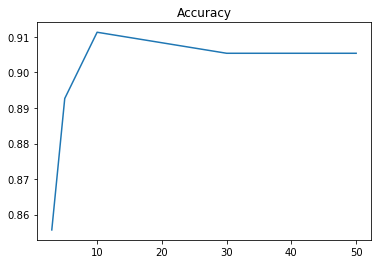

In [6]:
plt.figure()
plt.title("Accuracy")
plt.plot([accuracy[0][0],accuracy[1][0],accuracy[2][0],accuracy[3][0],accuracy[4][0],accuracy[5][0]],[accuracy[0][1],accuracy[1][1],accuracy[2][1],accuracy[3][1],accuracy[4][1],accuracy[5][1]])

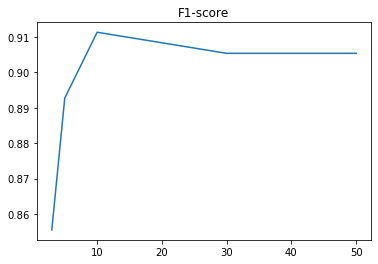

In [7]:
plt.figure()
plt.title("F1-score")
plt.plot([f1score[0][0],f1score[1][0],f1score[2][0],f1score[3][0],f1score[4][0],f1score[5][0]],[f1score[0][1],f1score[1][1],f1score[2][1],f1score[3][1],f1score[4][1],f1score[5][1]])

Résultats de la variation de l'hyper-paramètre de profondeur : 



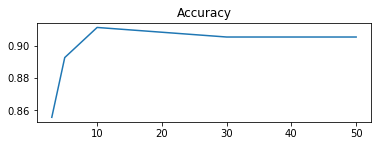

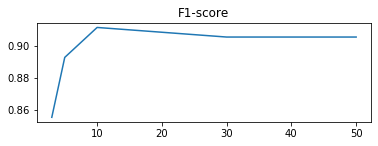

Le paramètre qui donne le meilleur f1 score est la profondeur maximale de :

(10, 0.9112866401928671)
10


In [60]:
def Decision_Tree(X_train, X_test, y_train, y_test):
    
    #Hyper parameters to be tested
    parameters=[None,3,5,10,30,50]
    
    #Train the Decision Tree for each different hyper paramters 
    accuracy =[]
    f1score = []
    models = []
    for dep in parameters: #For each hyper parameters to be tested
        
        clf_dt = DecisionTreeClassifier(random_state=1)#Create a decision tree 
        clf_dt.set_params(max_depth=dep) #Set the parameters to the decision tree
        clf_dt.fit(X_train,y_train,None) #Train the decision tree with the specified parameter
        y_pred = clf_dt.predict(X_test) #Predict data according to the hyperparameter with the test set        
   
        #Calculate the accuracy and F1 score of the model. 
        accuracy.append((dep,accuracy_score(y_test,y_pred)))
        f1score.append((dep,f1_score(y_test, y_pred, average='weighted')))
        models.append(clf_dt) #Store the model 
        
    
    print("Résultats de la variation de l'hyper-paramètre de profondeur : \n")
    
    plt.figure()
    plt.subplot(2,1,1)
    plt.title("Accuracy")
    plt.plot([accuracy[0][0],accuracy[1][0],accuracy[2][0],accuracy[3][0],accuracy[4][0],accuracy[5][0]],[accuracy[0][1],accuracy[1][1],accuracy[2][1],accuracy[3][1],accuracy[4][1],accuracy[5][1]])

    plt.figure()
    plt.subplot(2,1,2)
    plt.title("F1-score")
    plt.plot([f1score[0][0],f1score[1][0],f1score[2][0],f1score[3][0],f1score[4][0],f1score[5][0]],[f1score[0][1],f1score[1][1],f1score[2][1],f1score[3][1],f1score[4][1],f1score[5][1]])
    
    plt.show()
    
    l = [f1score[0][1],f1score[1][1],f1score[2][1],f1score[3][1],f1score[4][1],f1score[5][1]]
    print("Le paramètre qui donne le meilleur f1 score est la profondeur maximale de :\n")
    print(f1score[l.index(max(l))])
    
    #Return the best model
    return models[l.index(max(l))]
         
          
dt=Decision_Tree(X_train,X_test,y_train,y_test)
print(dt.get_depth())
cp = DecisionTreeClassifier(random_state=1)
